In [30]:
import os, rcmd, sys, plot_syn
from IPython.core.display import Image, display
reload(plot_syn)
%matplotlib inline

# Installation of the tool from "pristine" directory and running it for an experiment  with synthetic data ("identical twin")


In [ ]:
rcmd.run_command('./createdir_example_synthetic.sh')

In [31]:
cd tool_intro/example_synthetic/

/home/prs/esa_demo_pre2/tool_intro/example_synthetic


In [2]:
ls -ralt

total 1908
-rw-rw-r--  1 prs prs     499 Apr  3 07:45 README-DERIVATIVES.txt
-rw-rw-r--  1 prs prs     390 Apr  3 07:45 readme
-rw-rw-r--  1 prs prs      85 Apr  3 07:45 Make-local.inc
-rw-rw-r--  1 prs prs   19296 Apr  3 07:45 Makefile
drwxrwxr-x  2 prs prs    4096 Apr  3 07:45 lbfgsb/
drwxrwxr-x  2 prs prs    4096 Apr  3 07:45 input/
drwxrwxr-x  2 prs prs    4096 Apr  3 07:45 eispack/
drwxrwxr-x  2 prs prs    4096 Apr  3 07:45 driver/
drwxrwxr-x  2 prs prs    4096 Apr  3 07:45 bin/
drwxrwxr-x  8 prs prs    4096 Apr  3 07:45 src/
-rwxrwxr-x  1 prs prs  282400 Apr  3 07:45 simulate.x*
-rwxrwxr-x  1 prs prs 1593320 Apr  3 07:45 runretrieval.x*
-rw-rw-r--  1 prs prs     146 Apr  3 07:45 Make-local.inc.save
lrwxrwxrwx  1 prs prs      17 Apr  3 07:45 cost_fn.png -> ../../cost_fn.png*
drwxrwxr-x  2 prs prs    4096 Apr  3 07:45 objs/
drwxrwxr-x  2 prs prs    4096 Apr  3 07:45 lib/
drwxrwxr-x  3 prs prs    4096 Apr  3 07:45 ../
drwxrwxr-x 10 prs prs    4096 Apr  3 07:45 ./


### Terminate installation by setting up link to Signature Simulator installed on system:
(This has to be done only once)

In [8]:
# terminate the installation
rcmd.run_command('make setup')

bin/rs_setup.py
------------------------------
 Retrieval System Setup properly finished, Retrieval System ready for use!
------------------------------


0

In [ ]:
ls -ralt input/

### The protoype retrieval tool is shipped with a Makefile providing dedicated targets that illustrate it's basic usage
We will be looking into a target which runs a retrieval with synthetic data for both S1 and S2:

In [5]:
cat ../mk.complete.txt

complete: simulate.x runretrieval.x
	$(MAKE) clean_exp
	$(MAKE) presynthetic
	$(MAKE) synthetic
	$(MAKE) retrieval
	$(MAKE) save_exp SAVDIR=resdir_$(EXPV)_$@


### First we need to compile the drivers
The drivers `simulate.x` (to create synthetic observations) and `runretrieval.x` (which performs the actual retrieval including target processing) are implemented in Fortran.

In [ ]:
rcmd.run_command('make simulate.x runretrieval.x')

### Preproccessing step
It's task is to prepare the required input for creation of synthetic observations and performing the actual retrieval The preprocessor is a python script and is interfacing with the Fortran drivers via a set of Fortran-namelist and NetCDF files.

In [9]:
cat ../mk.pre.txt


pregeneral:
	$(MAKE) pre PRE_MODE=pre_general
.PHONY: pregeneral

presynthetic:
	$(MAKE) pre PRE_MODE=pre_synthetic
.PHONY: presynthetic


pre:
	( args="";   \
          if [ "x$(PRE_MODE)" = "xpre_synthetic" ]; then \
            args="--time_start $(TIMSTART) --time_end $(TIMEND)"; \
            if [ "x$(NOXTGT)" = "x" ]; \
            then \
              args="$${args} --target_schedule $(TGTSCHEDULE_FILE)"; \
            fi; \
	    if [ "x$(MISSION_LST)" != "x" ]; \
            then \
	      args="$${args} --mission_lst $(MISSION_LST)"; \
            fi; \
          fi; \
          args="$${args} $(PREARGXTRA)"; \
	  $(RS_PRE_TOOL) $(PRE_MODE) $${args} 2>&1 | tee mk.$@.log; \
        )

RS_PRE_TOOL     := bin/rs_pre.py
TIMSTART        := 20170501
TIMEND          := 20170531
TGTSCHEDULE_FILE := input/target_schedule_2017.txt


In [10]:
rcmd.run_command('bin/rs_pre.py pre_synthetic -h')

2019-04-03 08:51:10,278 INFO::<module>:: rs_pre.py::PROGRAM START::2019-04-03T08:51:10.278308
2019-04-03 08:51:10,278 INFO::<module>:: command-line: bin/rs_pre.py pre_synthetic -h
usage: ==================================================
PROJECT

Sentinel Synergy Study (S^3)

DESCRIPTION

Retrieval System Preprocessor

Implements/Provides all preprocessing steps required to operate the retrieval
prototype system

EXAMPLES

available options are listed by invoking 'rs_pre.py -h' on the command line

EXIT STATUS

should be 0 in case of success, 1 otherwise

AUTHOR

The Inversion Lab, Michael Vossbeck <Michael.Vossbeck@Inversion-Lab.com>

================================================== pre_synthetic
       [-h] [--time_start TIME_START] [--time_end TIME_END]
       [--target_select target_tmin target_tmax target_tdelta]
       [--target_schedule TARGET_SCHEDULE] [--site_nml SITE_NML]
       [--use_generic_prior] [--prior_inifile PRIOR_INIFILE]
       [--mission_lst {S1A,S1B,S2A,S2B} [{

0

Extra target retrieval times of interest (without presence of an observation) can be specified by a so called
`target schedule file`:

In [11]:
cat input/target_schedule_2017.txt

#selected points of time for target processor fmt='%Y%m%dT%H:%M:%S'
20170510T12:00:00
20170511T12:00:00
20170512T12:00:00
20170513T12:00:00
20170514T12:00:00
20170515T12:00:00
20170516T12:00:00
20170517T12:00:00
20170518T12:00:00
20170519T12:00:00
20170520T12:00:00


Run preprocessing (here for the period May 2017)...

In [12]:
rcmd.run_command('make presynthetic MISSION_LST="S1A S1B S2A S2B"')

make pre PRE_MODE=pre_synthetic
make[1]: Entering directory '/home/prs/esa_demo_pre2/tool_intro/example_synthetic'
( args="";   \
          if [ "xpre_synthetic" = "xpre_synthetic" ]; then \
            args="--time_start 20170501 --time_end 20170531"; \
            if [ "x" = "x" ]; \
            then \
              args="${args} --target_schedule input/target_schedule_2017.txt"; \
            fi; \
    if [ "xS1A S1B S2A S2B" != "x" ]; \
            then \
      args="${args} --mission_lst S1A S1B S2A S2B"; \
            fi; \
          fi; \
          args="${args} "; \
  bin/rs_pre.py pre_synthetic ${args} 2>&1 | tee mk.pre.log; \
        )
2019-04-03 08:52:45,484 INFO::<module>:: rs_pre.py::PROGRAM START::2019-04-03T08:52:45.484300
2019-04-03 08:52:45,484 INFO::<module>:: command-line: bin/rs_pre.py pre_synthetic --time_start 20170501 --time_end 20170531 --target_schedule input/target_schedule_2017.txt --mission_lst S1A S1B S2A S2B
2019-04-03 08:52:45,487 INFO::main:: user select

0

In [ ]:
ls -ralt

We take a short look into two of the generated files only.
`site.nml` containes site-specific parameters that control the simulation (for the synthetic case settings suitable for the Munich site are applied). `retrctl.nml` is dedicated to control the inversion.

In [13]:
cat site.nml

&site_params
    !location
    lat = 12.88  !latitude of site
    lon = 48.684  !longitude of site

    !soil characteristics
    clay = 0.23  !fraction soil texture clay
    sand = 0.27  !fraction soil texture sand
    bulk = 1.65  !soil bulk density (g cm-3)

    !microwave sense params
    freq = 5.405  !frequency (GHz)
    s = 0.015  !surface rms height (m)
    lai_coeff_kv = 0.1  !coefficient of lai for which to calculate extinction and volume scattering coefficients in V pol.
    lai_coeff_kh = 0.1  !coefficient of lai for which to calculate extinction and volume scattering coefficients in H pol.
    omega = 0.1  !coefficient for calculation of volume scattering coefficients

    !optical semi discrete params
    mode = 'fast'  !mode to run semiDiscrete in 'fast' or 'slow'
    rsl1 = 0.2  !weight of the first soil vector, default: 0.2
    sm_coeff = 0.5  !weighting of soil moisture impact, bound between (0,1)
    cab = 75.0  !leaf chlorophyl concentration, default: 75.0
    cw = 

The initial guess for the control vector when running the inversion procedure, will be the prior perturbed by 25%!

In [14]:
cat retrctl.nml

&RETRCTL
  retr_use_prior_term = .true. ! if .true. then J_p included in Eq. 1.5
  retr_use_model_term = .true. ! if .true. then J_m included in Eq. 1.5
  gradient_tol = 1.000000e-05 ! stopping criterion for minimisation: rel. reduction in gradient norm
  prior_pert = 2.500000e-01 ! initial guess will be the prior times (1+prior_pert)
/


![Cost function components](cost_fn.png)

In [15]:
cat ../mk.complete.txt

complete: simulate.x runretrieval.x
	$(MAKE) clean_exp
	$(MAKE) presynthetic
	$(MAKE) synthetic
	$(MAKE) retrieval
	$(MAKE) save_exp SAVDIR=resdir_$(EXPV)_$@


### Now start creation of synthetic observations...
This means here, we are generating observations with the `prior control vector`!

In [16]:
rcmd.run_command('make synthetic -n')

gfortran -o simulate.x -O3 -funroll-loops -floop-block -ftree-loop-distribution -march=native objs/runsim.o lib/libmodel.a lib/libsupport.a -L/usr/lib/x86_64-linux-gnu/lib -lnetcdff -lnetcdf
rm -f obs_s1.nc obs_s2.nc
./simulate.x  2>&1 | tee mk.synthetic.log
if [ -f sensimul_s1.nc ]; then mv sensimul_s1.nc obs_s1.nc; fi; \
 if [ -f sensimul_s2.nc ]; then mv sensimul_s2.nc obs_s2.nc; fi


0

In [17]:
rcmd.run_command('make synthetic')

gfortran -o simulate.x -O3 -funroll-loops -floop-block -ftree-loop-distribution -march=native objs/runsim.o lib/libmodel.a lib/libsupport.a -L/usr/lib/x86_64-linux-gnu/lib -lnetcdff -lnetcdf
./simulate.x  2>&1 | tee mk.synthetic.log
 INFO::runsim:calling initf...
 DEBUG::load_ivgeom:ndims= 2
 INFO::initf:retrieval configuration was read from ***retrconfig.nc***
 DEBUG::initf:ncrd_retrieval_config has finished, yields:npts=  30 npts_s1=  17 npts_s2=   2
 INFO::load_sitenml:successfully read site namelist file ***site.nml***
 INFO::setprior:prior control vector was read from ***retrprior.nc***
 DEBUG::setprior:ncrd_retrieval_prior terminated successfully
 INFO::runsim:...done.
 DEBUG::runsim:initf yields:n= 92 m= 60
 INFO::runsim:calling initx...
 INFO::runsim:...DONE.
 DEBUG::runsim::calling simulate_s1s2 at x ...
  j     x-physical       x-scaled        x-sigma
  1     0.10000000     1.00000000     0.10000000
  2     0.10000000     1.00000000     0.10000000
  3     0.00284149     2.000

0

In [18]:
ls -ralt

total 2056
-rw-rw-r--  1 prs prs     499 Apr  3 07:45 README-DERIVATIVES.txt
-rw-rw-r--  1 prs prs     390 Apr  3 07:45 readme
-rw-rw-r--  1 prs prs      85 Apr  3 07:45 Make-local.inc
-rw-rw-r--  1 prs prs   19296 Apr  3 07:45 Makefile
drwxrwxr-x  2 prs prs    4096 Apr  3 07:45 lbfgsb/
drwxrwxr-x  2 prs prs    4096 Apr  3 07:45 eispack/
drwxrwxr-x  2 prs prs    4096 Apr  3 07:45 driver/
drwxrwxr-x  2 prs prs    4096 Apr  3 07:45 bin/
drwxrwxr-x  8 prs prs    4096 Apr  3 07:45 src/
-rwxrwxr-x  1 prs prs 1593320 Apr  3 07:45 runretrieval.x*
-rw-rw-r--  1 prs prs     146 Apr  3 07:45 Make-local.inc.save
lrwxrwxrwx  1 prs prs      17 Apr  3 07:45 cost_fn.png -> ../../cost_fn.png*
drwxrwxr-x  2 prs prs    4096 Apr  3 07:45 objs/
drwxrwxr-x  2 prs prs    4096 Apr  3 07:45 lib/
drwxrwxr-x  3 prs prs    4096 Apr  3 07:45 ../
drwxrwxr-x  2 prs prs    4096 Apr  3 08:46 input/
-rw-rw-r--  1 prs prs    1056 Apr  3 08:52 site.nml
-rw-rw-r--  1 prs prs   17499 Apr  3 08:52 retrconfig.nc
-rw-rw-r-- 

### ... that is how they look like:

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb3e2cf85d0>)

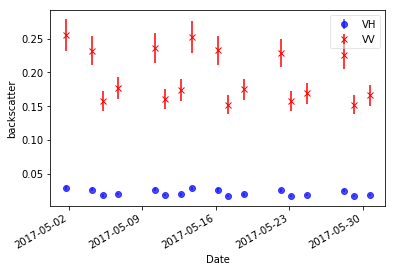

In [19]:
plot_syn.plot_obs_s1('obs_s1.nc')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb3e2c52f10>)

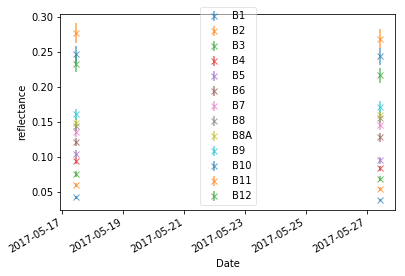

In [20]:
plot_syn.plot_obs_s2('obs_s2.nc')

### Based on this "observational data" and the settings created by the preprocessor, we can now start with the retrieval

In [ ]:
rcmd.run_command('make retrieval -n')

In [21]:
rcmd.run_command('./runretrieval.x --help')


STOP 0

 available options:
  --dbglev         increase level of verbosity
  --no_targets     disable target retrievals (Note: In particular, FAPAR retrieval may be time-consuming)




0

Here, to speed up things, we do this step without retrieving `FAPAR` and `HH backscatter` (in particular retrieving can be expensive in time)

In [22]:
rcmd.run_command('make retrieval RETRARGXTRA=--no_targets')

gfortran -o runretrieval.x -O3 -funroll-loops -floop-block -ftree-loop-distribution -march=native objs/runretrieval.o lib/libretr.a lib/libderiv.a lib/libmodel.a lib/libsupport.a lib/liblbfgsb-gfortran.a lib/libeis.a -L/usr/lib/x86_64-linux-gnu/lib -lnetcdff -lnetcdf
./runretrieval.x --no_targets 2>&1 | tee mk.retrieval.log
 INFO::retrieval_read_ctl:read settings from file ***retrctl.nml***...
 INFO::retrieval_read_ctl:...reading done.
 INFO::use_prior_term: T
 INFO::use_state_term: T
 INFO::gradient_tolerance: .10000E-04
 INFO::prior_pert: .25000E+00
 INFO::runretrieval:will apply relative perturbation of prior with pert=  0.25
 INFO::runretrieval:calling initf...
 DEBUG::load_ivgeom:ndims= 2
 INFO::initf:retrieval configuration was read from ***retrconfig.nc***
 DEBUG::initf:ncrd_retrieval_config has finished, yields:npts=  30 npts_s1=  17 npts_s2=   2
 INFO::load_sitenml:successfully read site namelist file ***site.nml***
 INFO::setprior:prior control vector was read from ***retrpri

0

Save set of involved files for this experiment in an extra directory (optional, of course)

In [23]:
rcmd.run_command('make save_exp SAVDIR=ex_complete')

if [ "xex_complete" != "x" ]; then \
          mkdir -p ex_complete; \
          rm -f ex_complete/*; \
          for f in `echo retrconfig.nc retrprior.nc retrmodel.nc retrctl.nml site.nml retrctlvecbounds.nml x.b sx.b fort.[0-9] fort.[0-9][0-9] sensimul_s?.nc sensimul_s?.b sensimul.b x.b sx.b iterate.dat Cx.b sigma.dat xrunua.log sigma.dat mk.pre.log iterate.dat controlvector_prior.nc controlvector_post.nc fapar_prior.nc fapar_post.nc backscatter_hh_prior.nc backscatter_hh_post.nc mk.retrieval.log sigma.dat controlvector_prior.nc controlvector_post.nc fapar_prior.nc fapar_poast.nc backscatter_hh_prior.nc backscatter_hh_post.nc mk.mba.log obs_s1.nc obs_s2.nc simulation.nc mk.synthetic.log`; \
          do \
    if [ -f ${f} ]; \
            then \
              cp -a ${f} ex_complete; \
            fi; \
          done; \
        fi;


0

In [ ]:
ls -ralt ex_complete

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb3e2c5d410>)

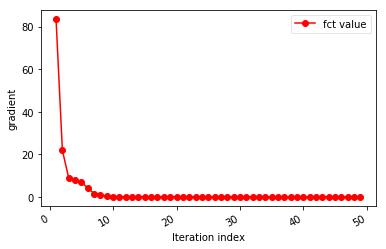

In [26]:
plot_syn.plot_iterate('ex_complete/iterate.dat', var='fct')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb3e09d6790>)

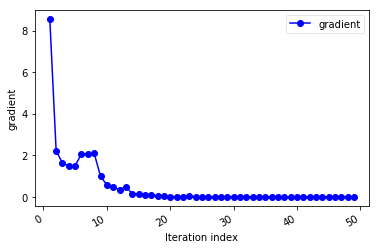

In [27]:
plot_syn.plot_iterate('ex_complete/iterate.dat', var='grad')

### Since we were running an identical twin experiment, the retrieval procedure should be capable of recovering the "true" control vector

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb3e06b66d0>)

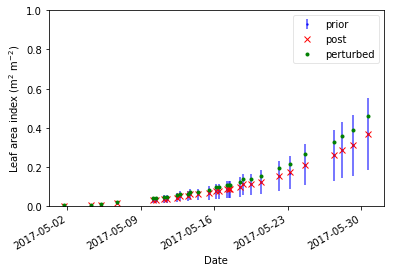

In [35]:
plot_syn.plot_state('lai', _dir='ex_complete')